# 高校数学とJulia言語 Day 4

- 城北中学校・高等学校　中学3年・高校1年
- 夏期講習会III 2025/8/24~2025/8/28
- 担当：清水団

## 本日のテーマ：データの可視化と統計処理

### 5日間の学習予定
- **Day 1**：Google Colabの紹介・基本計算 ✅
- **Day 2**：関数のグラフの描画 ✅
- **Day 3**：最適化（最大・最小） ✅
- **Day 4**：データの分析 ← 今日
- **Day 5**：確率・シミュレーション

今日は実際のデータを使って、統計の基本と可視化を学びます！


## データサイエンスの重要性

現代社会では、データに基づいた判断が重要になっています：

- **スポーツ**：選手のパフォーマンス分析
- **医療**：病気の早期発見、治療効果の測定
- **教育**：学習効果の測定、個別指導の最適化
- **ビジネス**：売上予測、顧客分析
- **環境**：気候変動の分析

今日は、グラフを描いてデータの特徴を理解し、統計量を計算してデータを定量的に分析する方法を学びます。


## 必要なパッケージの準備

統計処理に必要なパッケージを読み込みましょう。


In [ ]:
# パッケージのインストール（初回のみ実行）
import Pkg
Pkg.add(["Statistics", "StatsBase", "Random", "StatsPlots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [ ]:
# パッケージの読み込み
using Plots
using Statistics       # 統計関数（mean, std など）
using StatsBase        # 統計分析（mode,cor など）
using Random           # 乱数生成
using StatsPlots       # 統計グラフ作成(boxplot)

# フォント設定（日本語ラベルのため）
using Pkg
Pkg.add(url="https://github.com/ujimushi/PlotsGRBackendFontJaEmoji.jl")
using PlotsGRBackendFontJaEmoji
gr()

# 乱数のシードを設定（結果を再現可能にする）
Random.seed!(42)

println("パッケージの読み込み完了！")

パッケージの読み込み完了！


## 基本的な統計量を計算してみよう

### 問題1：テストの点数データの分析

あるクラスの数学のテストの点数を分析してみましょう。


In [ ]:
# サンプルデータ：あるクラスの数学のテストの点数
test_scores = [85, 92, 78, 88, 95, 82, 90, 87, 83, 91, 76, 89, 94, 80, 86]

println("数学のテストの点数：", test_scores)
println("データの個数：", length(test_scores))

数学のテストの点数：[85, 92, 78, 88, 95, 82, 90, 87, 83, 91, 76, 89, 94, 80, 86]
データの個数：15


In [ ]:
# 基本統計量の計算
println("=== 基本統計量 ===")
println("平均値：", round(mean(test_scores), digits=2))
println("中央値：", median(test_scores))
println("最頻値：", mode(test_scores))
println("")
println("最大値：", maximum(test_scores))
println("最小値：", minimum(test_scores))
println("範囲：", maximum(test_scores) - minimum(test_scores))
println("")
println("分散：", round(var(test_scores), digits=2))
println("標準偏差：", round(std(test_scores), digits=2))
println("")
println("第1四分位数：", quantile(test_scores, 0.25))
println("第3四分位数：", quantile(test_scores, 0.75))
println("四分位範囲：", quantile(test_scores, 0.75) - quantile(test_scores, 0.25))

=== 基本統計量 ===
平均値：86.4
中央値：87.0
最頻値：85

最大値：95
最小値：76
範囲：19

分散：32.83
標準偏差：5.73

第1四分位数：82.5
第3四分位数：90.5
四分位範囲：8.0


## ヒストグラムでデータの分布を見てみよう

ヒストグラムは、データの分布を視覚的に表現する重要なグラフです。


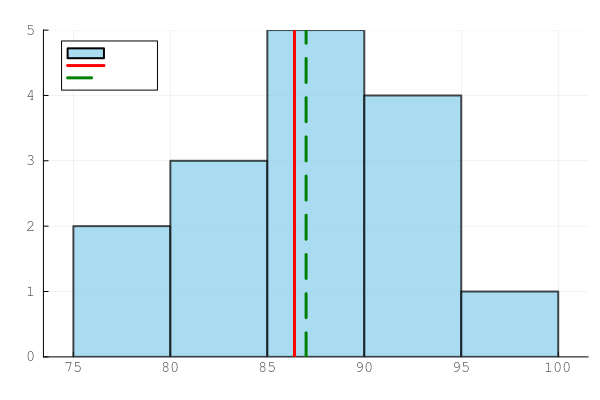

GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 12486
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12488
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 20998
GKS: glyph missing from current font: 24067
GKS: invalid bitmap size
GKS: glyph missing from current font: 12498
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12488
GKS: glyph missing from current font: 12464
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12512
GKS: invalid bitmap size
GKS: glyph missing f

In [ ]:
# 基本的なヒストグラム
histogram(test_scores, bins=5,
         title="数学テストの点数分布",
         xlabel="点数",
         ylabel="人数",
         color=:skyblue,
         linewidth=2,
         alpha=0.7,
         label="ヒストグラム")

# 平均値の線を追加
vline!([mean(test_scores)], linewidth=3, color=:red, label="平均値")

# 中央値の線を追加
vline!([median(test_scores)], linewidth=3, color=:green, label="中央値", linestyle=:dash)

## 散布図で関係性を探ってみよう

### 問題2：学習時間と成績の関係分析

散布図は、2つの変数の関係を視覚的に表現するのに最適なグラフです。


学習時間と成績の相関係数：0.986


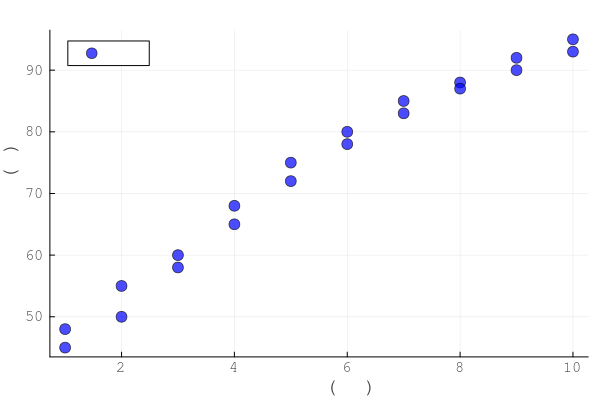

GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 32722
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 32722
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 35430
GKS: glyph missing from current font: 39443
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 35430
GKS: glyph missing from current font: 39443
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 28857
GKS: glyph missing from current 

In [ ]:
# 学習時間と成績の関係を調べるデータ
study_hours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 1, 10]
exam_scores = [45, 55, 60, 68, 75, 80, 85, 88, 92, 95, 50, 58, 65, 72, 78, 83, 87, 90, 48, 93]

# 相関係数を計算
correlation = cor(study_hours, exam_scores)
println("学習時間と成績の相関係数：", round(correlation, digits=3))

# 散布図の作成
scatter(study_hours, exam_scores,
        title="学習時間と試験成績の関係",
        xlabel="学習時間 (時間)",
        ylabel="試験成績 (点)",
        color=:blue,
        markersize=6,
        alpha=0.7,
        label="データ点")

回帰直線の方程式：y = 5.44x + 43.43


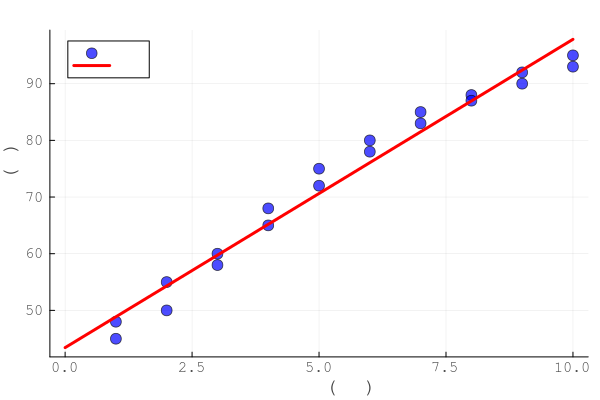

GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 32722
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 32722
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 35430
GKS: glyph missing from current font: 39443
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 35430
GKS: glyph missing from current font: 39443
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 28857
GKS: glyph missing from current 

In [ ]:
# 回帰直線を追加
# 最小二乗法で回帰直線の係数を求める
n = length(study_hours)
x_mean = mean(study_hours)
y_mean = mean(exam_scores)

# 回帰直線の傾き
slope = sum((study_hours .- x_mean) .* (exam_scores .- y_mean)) / sum((study_hours .- x_mean).^2)
# 回帰直線の切片
intercept = y_mean - slope * x_mean

println("回帰直線の方程式：y = ", round(slope, digits=2), "x + ", round(intercept, digits=2))

# 散布図と回帰直線を描画
scatter(study_hours, exam_scores,
        title="学習時間と試験成績の関係（回帰直線付き）",
        xlabel="学習時間 (時間)",
        ylabel="試験成績 (点)",
        color=:blue,
        markersize=6,
        alpha=0.7,
        label="データ点")

# 回帰直線を追加
x_line = 0:0.1:10
y_line = slope .* x_line .+ intercept
plot!(x_line, y_line, color=:red, linewidth=3, label="回帰直線")

## 複数のデータを比較してみよう

### 問題3：2つのクラスの成績比較

異なるグループのデータを比較することで、より深い洞察を得ることができます。


In [ ]:
# 2つのクラスのテスト結果
class_a = [75, 80, 85, 78, 82, 88, 76, 84, 79, 87, 81, 83, 86, 77, 89]
class_b = [70, 85, 90, 72, 88, 92, 74, 86, 73, 91, 89, 87, 94, 75, 93]

println("=== Aクラスの統計量 ===")
println("平均値：", round(mean(class_a), digits=2))
println("中央値：", median(class_a))
println("標準偏差：", round(std(class_a), digits=2))

println("\n=== Bクラスの統計量 ===")
println("平均値：", round(mean(class_b), digits=2))
println("中央値：", median(class_b))
println("標準偏差：", round(std(class_b), digits=2))

=== Aクラスの統計量 ===
平均値：82.0
中央値：82.0
標準偏差：4.47

=== Bクラスの統計量 ===
平均値：83.93
中央値：87.0
標準偏差：8.56


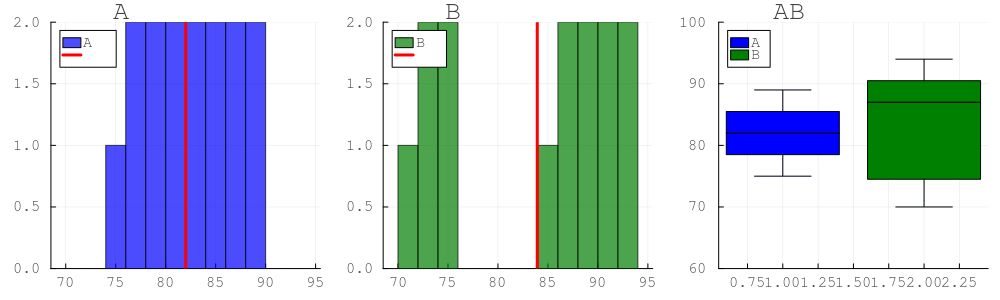

GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 12463
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 20998
GKS: glyph missing from current font: 24067
GKS: glyph missing from current font: 12463
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 20998
GKS: glyph missing from current font: 24067
GKS: glyph missing from current font: 12463
GKS: glyph missing from cu

In [ ]:
# 2つのクラスのヒストグラムを比較
# データの範囲を確認して階級を統一
min_score = min(minimum(class_a), minimum(class_b))
max_score = max(maximum(class_a), maximum(class_b))
bin_edges = min_score:2:max_score  # 2点刻みで階級を設定

p1 = histogram(class_a, bins=bin_edges, alpha=0.7, color=:blue,
              title="Aクラスの成績分布", xlabel="点数", ylabel="人数", label="Aクラス")
vline!([mean(class_a)], color=:red, linewidth=3, label="平均値")

p2 = histogram(class_b, bins=bin_edges, alpha=0.7, color=:green,
              title="Bクラスの成績分布", xlabel="点数", ylabel="人数", label="Bクラス")
vline!([mean(class_b)], color=:red, linewidth=3, label="平均値")


# # 箱ひげ図
boxplot(class_a, ylabel="点数",ylim = (60,100),color=:blue,label="A組")

p3 = boxplot!(class_b, title="ABクラスの箱ひげ図", ylabel="点数",ylim = (60,100),color=:green,label="B組")

plot(p1, p2, p3, layout=(1,3), size=(1000, 300))


## 実際のデータ分析例：気温と売上の関係

アイスクリーム店の売上データを分析してみましょう。


In [ ]:
# アイスクリーム店のデータ（架空）
Random.seed!(123)

# 15日間のデータ
days = 1:15
temperatures = 20 .+ 8 * rand(15)  # 20-28℃の気温
# 売上は気温に比例 + ランダム要素
sales = 1000 .+ 150 * temperatures .+ 300 * randn(15)
sales = max.(1000, sales)  # 売上は1000円以上

println("気温と売上のデータ：")
for i in 1:15
    println("Day ", i, ": ", round(temperatures[i], digits=1), "℃, ", round(Int, sales[i]), "円")
end

println("\n相関係数：", round(cor(temperatures, sales), digits=3))

気温と売上のデータ：
Day 1: 27.3℃, 5001円
Day 2: 23.5℃, 4569円
Day 3: 26.0℃, 4904円
Day 4: 24.1℃, 4684円
Day 5: 22.0℃, 3925円
Day 6: 22.7℃, 4048円
Day 7: 23.4℃, 4471円
Day 8: 26.9℃, 4804円
Day 9: 24.7℃, 5136円
Day 10: 22.5℃, 4529円
Day 11: 21.0℃, 3988円
Day 12: 21.6℃, 4546円
Day 13: 23.1℃, 4090円
Day 14: 20.1℃, 4206円
Day 15: 20.6℃, 4046円

相関係数：0.789


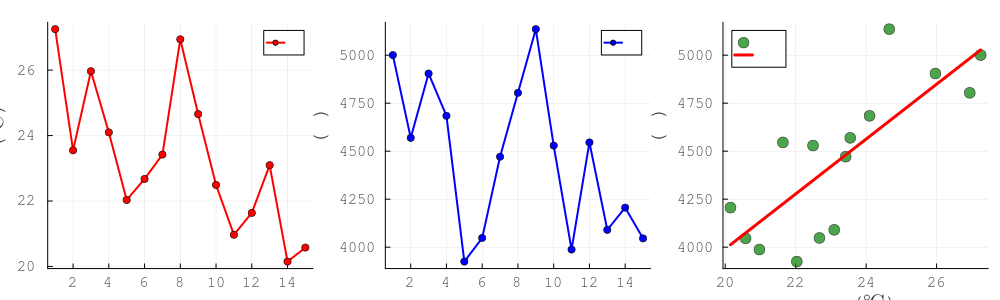

GKS: glyph missing from current font: 26085
GKS: invalid bitmap size
GKS: glyph missing from current font: 27671
GKS: glyph missing from current font: 28201
GKS: glyph missing from current font: 27671
GKS: glyph missing from current font: 28201
GKS: glyph missing from current font: 26085
GKS: glyph missing from current font: 21029
GKS: glyph missing from current font: 27671
GKS: glyph missing from current font: 28201
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 22793
GKS: glyph missing from current font: 21270
GKS: invalid bitmap size
GKS: glyph missing from current font: 27671
GKS: glyph missing from current font: 28201
GKS: invalid bitmap size
GKS: glyph missing from current font: 26085
GKS: invalid bitmap size
GKS: glyph missing from current font: 22770
GKS: glyph missing from current font: 19978
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 22770
GKS: glyph missing from current font: 19978
GKS: glyph missing f

In [ ]:
# データの可視化
p1 = plot(days, temperatures,
         title="日別気温の変化", xlabel="日", ylabel="気温 (℃)",
         color=:red, linewidth=2, marker=:circle, markersize=4, label="気温")

p2 = plot(days, sales,
         title="日別売上の変化", xlabel="日", ylabel="売上 (円)",
         color=:blue, linewidth=2, marker=:circle, markersize=4, label="売上")

p3 = scatter(temperatures, sales,
            title="気温と売上の関係", xlabel="気温 (℃)", ylabel="売上 (円)",
            color=:green, markersize=6, alpha=0.7, label="データ点")

# 回帰直線を追加
temp_mean = mean(temperatures)
sales_mean = mean(sales)
slope = sum((temperatures .- temp_mean) .* (sales .- sales_mean)) / sum((temperatures .- temp_mean).^2)
intercept = sales_mean - slope * temp_mean

temp_range = minimum(temperatures):0.1:maximum(temperatures)
regression_line = slope .* temp_range .+ intercept
plot!(p3, temp_range, regression_line, color=:red, linewidth=3, label="回帰直線")

plot(p1, p2, p3, layout=(1,3), size=(1000, 300))

## Day 4 の演習問題

以下の問題に取り組んで、データ分析の技術を身につけましょう。

### 問題1: 基本統計量の計算

以下のデータは、ある高校の生徒20人の身長（cm）です：

```
heights = [165, 170, 168, 172, 160, 175, 169, 171, 167, 173,
           162, 174, 166, 168, 170, 169, 171, 164, 172, 167]
```

1. 平均身長、中央値、標準偏差を計算してください
2. ヒストグラムを作成して、データの分布を可視化してください
3. 平均値と中央値の線をヒストグラムに追加してください
4. 箱ひげ図を作成しよう。

### 問題2: 相関分析

以下のデータは、10人の生徒の数学と物理の成績です：

```
math_scores = [85, 90, 78, 92, 88, 75, 95, 82, 87, 91]
physics_scores = [80, 88, 75, 90, 85, 70, 92, 78, 84, 89]
```

1. 数学と物理の成績の相関係数を計算してください
2. 散布図を作成して、2つの科目の関係を可視化してください
3. 回帰直線を追加して、回帰式を求めてください
4. 散布図や回帰直線から，どのようなことがわかりますか？また，数学と物理の学習に役立てるにはどうすればいいですか？



## 解答欄

以下のセルに解答を記入してください。


### 問題1の解答：基本統計量の計算

In [ ]:
# 問題1: 身長データの統計分析
heights = [165, 170, 168, 172, 160, 175, 169, 171, 167, 173,
           162, 174, 166, 168, 170, 169, 171, 164, 172, 167]

# 1. 平均身長、中央値、標準偏差を計算してください

@show mean(heights)
@show median(heights)
@show std(heights)


mean(heights) = 168.65
median(heights) = 169.0
std(heights) = 3.9239480655396846


3.9239480655396846

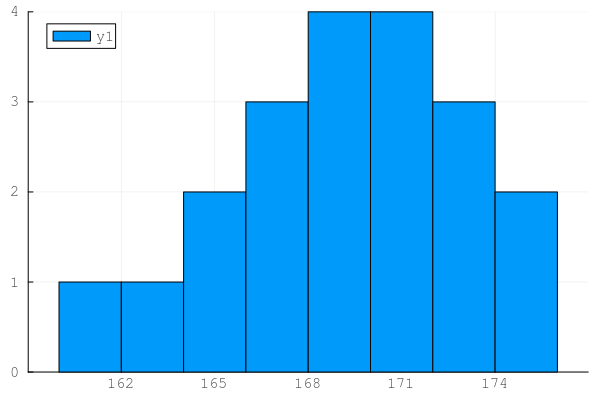

In [ ]:
# 2. ヒストグラムを作成して、データの分布を可視化してください。
# bin の値は調整してみよう

histogram(heights,bin=10)

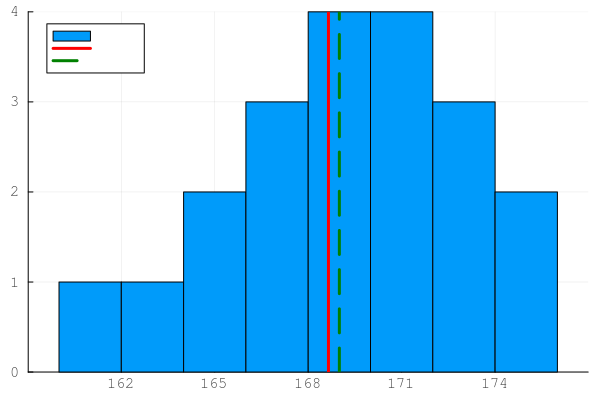

GKS: glyph missing from current font: 12498
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12488
GKS: glyph missing from current font: 12464
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12512
GKS: invalid bitmap size
GKS: glyph missing from current font: 24179
GKS: glyph missing from current font: 22343
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size
GKS: glyph missing from current font: 20013
GKS: glyph missing from current font: 22830
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [ ]:
# 3. 平均値と中央値の線をヒストグラムに追加してください

histogram(heights,bin=10,label="ヒストグラム")
vline!([mean(heights)], color=:red, linewidth=3, label="平均値")
vline!([median(heights)], linewidth=3, color=:green, label="中央値", linestyle=:dash)


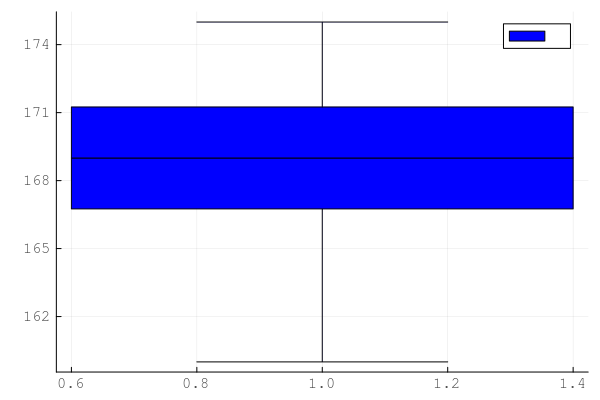

GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 36523
GKS: glyph missing from current font: 38263
GKS: invalid bitmap size


In [ ]:
# 4. 箱ひげ図を作成しよう。

# 箱ひげ図
boxplot(heights, ylabel="点数",color=:blue,label="身長")

### 問題2の解答：相関分析

In [ ]:
# 問題2: 数学と物理の成績の相関分析
math_scores = [85, 90, 78, 92, 88, 75, 95, 82, 87, 91]
physics_scores = [80, 88, 75, 90, 85, 70, 92, 78, 84, 89]

# 1. 数学と物理の成績の相関係数を計算してください


# 相関係数を計算
correlation = cor(math_scores, physics_scores)
println("学習時間と成績の相関係数：", round(correlation, digits=3))



学習時間と成績の相関係数：0.993


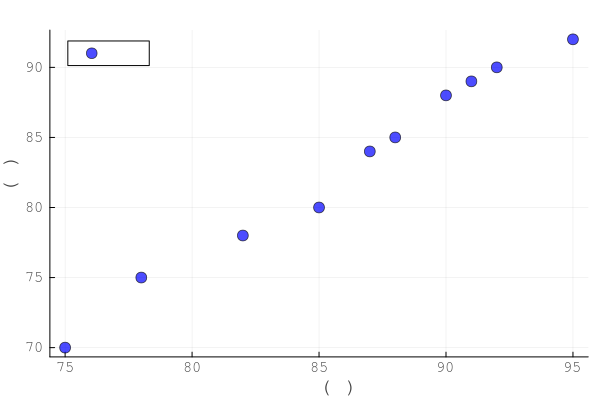

GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 12392
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 38306
GKS: glyph missing from current 

In [ ]:
# 2. 散布図を作成して、2つの科目の関係を可視化してください

# 散布図の作成
scatter(math_scores, physics_scores,
        title="数学と物理の成績の関係",
        xlabel="数学 (点)",
        ylabel="物理 (点)",
        color=:blue,
        markersize=6,
        alpha=0.7,
        label="データ点")

回帰直線の方程式：y = 1.12x + -13.53


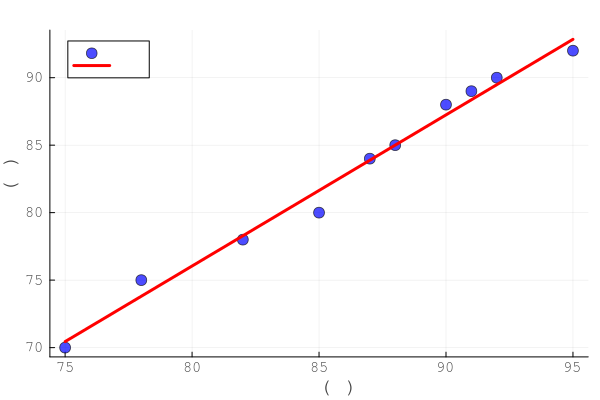

GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 23398
GKS: glyph missing from current font: 12392
GKS: glyph missing from current font: 29289
GKS: glyph missing from current font: 29702
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25104
GKS: glyph missing from current font: 32318
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 38306
GKS: glyph missing from current 

In [ ]:
# 3. 回帰直線を追加して、回帰式を求めてください

# 回帰直線を追加
# 最小二乗法で回帰直線の係数を求める
n = length(math_scores)
x_mean = mean(math_scores)
y_mean = mean(physics_scores)

# 回帰直線の傾き
slope = sum((math_scores .- x_mean) .* (physics_scores .- y_mean)) / sum((math_scores .- x_mean).^2)
# 回帰直線の切片
intercept = y_mean - slope * x_mean

println("回帰直線の方程式：y = ", round(slope, digits=2), "x + ", round(intercept, digits=2))

# 散布図と回帰直線を描画
scatter(math_scores, physics_scores,
        title="数学と物理の成績の関係",
        xlabel="数学 (点)",
        ylabel="物理 (点)",
        color=:blue,
        markersize=6,
        alpha=0.7,
        label="データ点")

# 回帰直線を追加
x_line = 75:0.1:95
y_line = slope .* x_line .+ intercept
plot!(x_line, y_line, color=:red, linewidth=3, label="回帰直線")

4. 散布図や回帰直線から，どのようなことがわかりますか？また，数学と物理の学習に役立てるにはどうすればいいですか？
（自由に書いてみましょう）

- まず，「数学ができると物理もできる」「数学ができないと物理もできない」という傾向が見て取れる。
- 今物理は苦手ではあるが，数学の学習を進めてできるようになれば，物理もできるようになるかもしれない。
  

## まとめ

今日はデータ分析の基本を学びました。

### 学習した内容

#### 統計の基本
- **基本統計量**：平均値、中央値、標準偏差、四分位数
- **データの分布**：ヒストグラムによる可視化
- **データの散らばり**：分散と標準偏差による定量化

#### データの可視化
- **ヒストグラム**：データの分布を表現
- **散布図**：2変数の関係性を可視化
- **箱ひげ図**：複数グループの比較

#### 関係性の分析
- **相関係数**：2つの変数の関係の強さを定量化
- **回帰直線**：データの傾向を直線で表現
- **最小二乗法**：最適な直線の求め方

#### 重要なポイント
- データを可視化することで、数値だけでは見えないパターンが見える
- 相関関係があっても因果関係があるとは限らない
- 複数の統計量を組み合わせてデータを理解する

### 次回予告

Day 5では、確率とシミュレーションについて学習します。ランダムな現象をJuliaでモデル化し、確率的な予測を行う方法を学びましょう！

### 提出について

このノートブックに解答を記入し、保存してからGoogle Classroomに提出してください。特に問題3では、創意工夫を凝らした分析を期待しています！

### 参考資料

- Julia Statistics Documentation: https://docs.julialang.org/en/v1/stdlib/Statistics/
- StatsBase.jl: https://github.com/JuliaStats/StatsBase.jl
- Plots.jl: https://docs.juliaplots.org/latest/
